# Aim

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day.
Visualize accident hotspots and contributing factors.

In [1]:
# Import libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from pyproj import Proj, transform
from folium.plugins import HeatMap, MarkerCluster



In [2]:
# Load dataset
original_df = pd.read_csv('accident.csv')
df = original_df.copy()
df

Reference Number  Grid Ref: Easting  Grid Ref: Northing  \
0             1112091             429175              431904   
1             1180869             430429              431025   
2             1180869             430429              431025   
3             11A0238             424660              427582   
4             11A0238             424660              427582   
...               ...                ...                 ...   
2528          1CV0080             428839              433995   
2529          1CV0542             436092              434785   
2530          2130577             426119              426906   
2531          21D1298             430261              431186   
2532          25D0630             430906              433484   

      Number of Vehicles  Number of Casualties Accident Date  Time (24hr)  \
0                      2                     1    01/01/2014         1840   
1                      3                     2    08/01/2014         1430   
2                      3                     2    08/01/2014         1430   
3                      3                     2    10/01/2014          817   
4                      3                     2    10/01/2014          817   
...                  ...                   ...           ...          ...   
2528                   1                     1    31/12/2014          153   
2529                   2                     1    31/12/2014         1310   
2530                   1                     1    25/12/2014          830   
2531                   1                     1    27/12/2014           50   
2532                   2                     1    13/05/2014         1220   

      1st Road Class  Road Surface  Lighting Conditions  Weather Conditions  \
0                  6             2                    4                   2   
1                  1             2                    1                   1   
2                  1             2                    1                   1   
3                  1             1                    1                   1   
4                  1             1                    1                   1   
...              ...           ...                  ...                 ...   
2528               6             2                    4                   1   
2529               6             2                    1                   1   
2530               6             1                    1                   1   
2531               6             1                    7                   1   
2532               6             1                    1                   1   

      Casualty Class  Casualty Severity  Sex of Casualty  Age of Casualty  \
0                  1                  3                1               58   
1                  1                  3                1               69   
2                  1                  3                2               41   
3                  1                  3                1               35   
4                  1                  3                1               25   
...              ...                ...              ...              ...   
2528               3                  2                1               19   
2529               2                  3                2               15   
2530               2                  3                1               71   
2531               3                  3                1               23   
2532               1                  2                1               77   

      Type of Vehicle  
0                   9  
1                   9  
2                   9  
3                   9  
4                   9  
...               ...  
2528                8  
2529                9  
2530                8  
2531                9  
2532               22  

[2533 rows x 16 columns]

In [3]:
# Understanding dataset
print("\nNull count of each column : ")
df.isnull().sum()


Null count of each column : 


Reference Number        0
Grid Ref: Easting       0
Grid Ref: Northing      0
Number of Vehicles      0
Number of Casualties    0
Accident Date           0
Time (24hr)             0
1st Road Class          0
Road Surface            0
Lighting Conditions     0
Weather Conditions      0
Casualty Class          0
Casualty Severity       0
Sex of Casualty         0
Age of Casualty         0
Type of Vehicle         0
dtype: int64

In [4]:
print("\nNumber of duplicated rows : ", df.duplicated().sum())

print("\nLength of data before dropping duplicate rows : ", len(original_df))
df = df.drop_duplicates()
print("\nLength of data after dropping duplicate rows : ", len(df))



Number of duplicated rows :  26

Length of data before dropping duplicate rows :  2533

Length of data after dropping duplicate rows :  2507


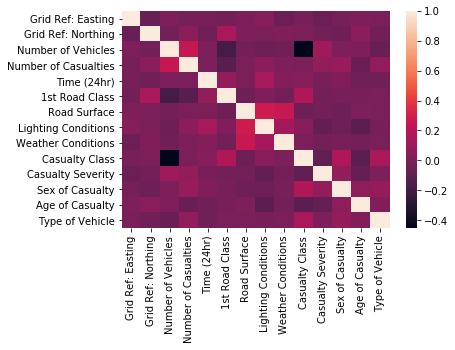

In [5]:
# Finding if there exist any relationship between various columns

sns.heatmap(df.corr())

# Accident Severity

C:\Users\pclat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


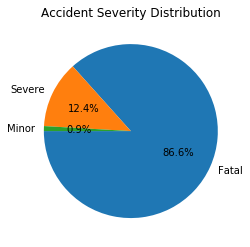

In [6]:
severity_map = {1: 'Minor', 2: 'Severe', 3: 'Fatal'}
df['Severity Category'] = df['Casualty Severity'].map(severity_map)

severity_counts = df['Severity Category'].value_counts()
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Accident Severity Distribution')
plt.show()

# Patterns Based on Time of Day:



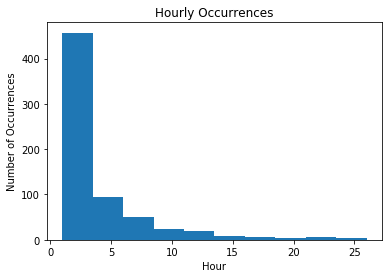

In [7]:
df.groupby('Time (24hr)')['Reference Number'].count().plot(kind='hist')
plt.xlabel("Hour")
plt.ylabel("Number of Occurrences")
plt.title("Hourly Occurrences")
plt.show()


# Impact of Weather  

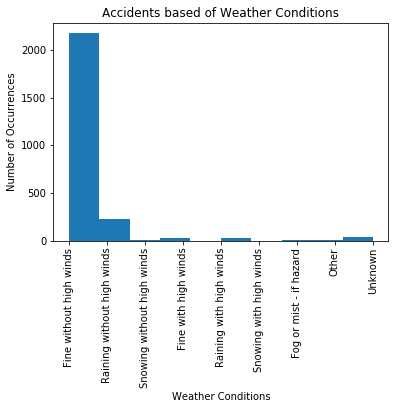

In [8]:

weather_conditions = {1: 'Fine without high winds', 
                      2: 'Raining without high winds', 
                      3: 'Snowing without high winds', 
                      4: 'Fine with high winds', 
                      5: 'Raining with high winds', 
                      6: 'Snowing with high winds', 
                      7: 'Fog or mist - if hazard', 
                      8: 'Other', 
                      9: 'Unknown'}

plt.hist(df['Weather Conditions'], bins=10)
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Occurrences")
plt.title("Accidents based of Weather Conditions")
plt.xticks([1,2,3,4,5,6,7,8,9], ["Fine without high winds","Raining without high winds","Snowing without high winds",
                                 "Fine with high winds","Raining with high winds","Snowing with high winds",
                                 "Fog or mist - if hazard","Other","Unknown"])
plt.xticks(rotation=90)
plt.show()


# Impact of Road Surface

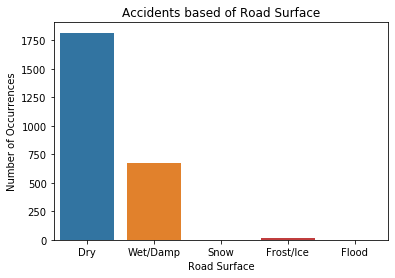

In [9]:
Road_Surface = {1: 'Dry', 
                2: 'Wet/Damp', 
                3: 'Snow', 
                4: 'Frost/Ice', 
                5: 'Flood '}

sns.countplot(x='Road Surface', data=df)
plt.xlabel("Road Surface")
plt.ylabel("Number of Occurrences")
plt.title("Accidents based of Road Surface")
plt.xticks([0,1,2,3,4],['Dry', 'Wet/Damp','Snow','Frost/Ice','Flood'])
plt.show()

# Visualize accident contributing factors.

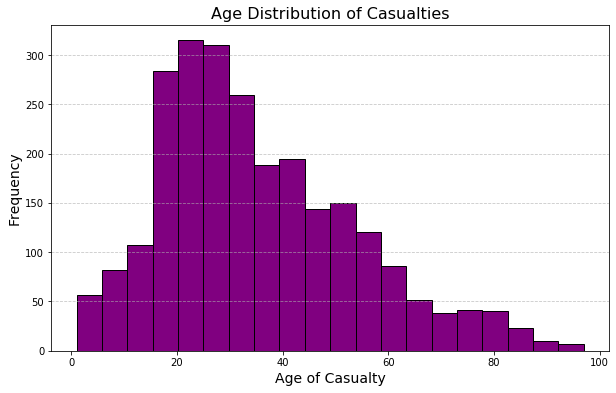

In [10]:
# Histogram for Age of Casualty

plt.figure(figsize=(10, 6))
plt.hist(df['Age of Casualty'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title('Age Distribution of Casualties', fontsize=16)
plt.xlabel('Age of Casualty', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


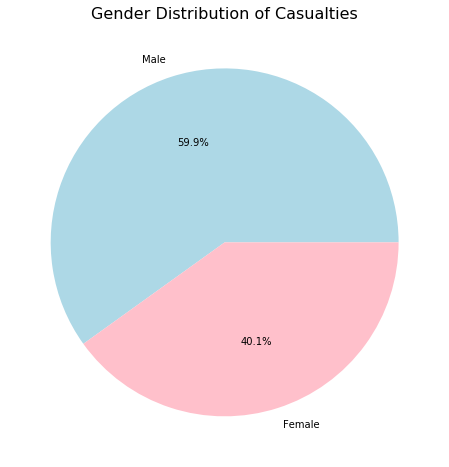

In [11]:
# Gender distribution pie chart

gender_counts = df['Sex of Casualty'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution of Casualties', fontsize=16)
plt.show()


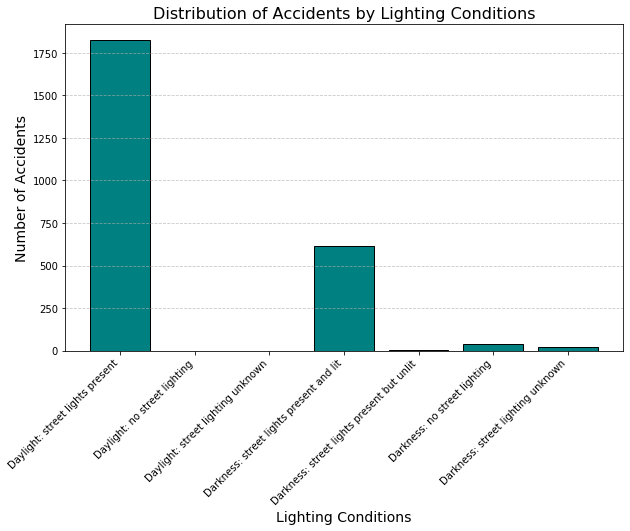

In [12]:
# Group data by Lighting Conditions
lighting_counts = df['Lighting Conditions'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(lighting_counts.index, lighting_counts.values, color='teal', edgecolor='black')
plt.title('Distribution of Accidents by Lighting Conditions', fontsize=16)
plt.xlabel('Lighting Conditions', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks([1,2,3,4,5,6,7],['Daylight: street lights present','Daylight: no street lighting',
                            'Daylight: street lighting unknown','Darkness: street lights present and lit',
                            'Darkness: street lights present but unlit','Darkness: no street lighting',
                            'Darkness: street lighting unknown']
            ,rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Accident Date
2014-10-03    21
Name: Reference Number, dtype: int64


C:\Users\pclat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


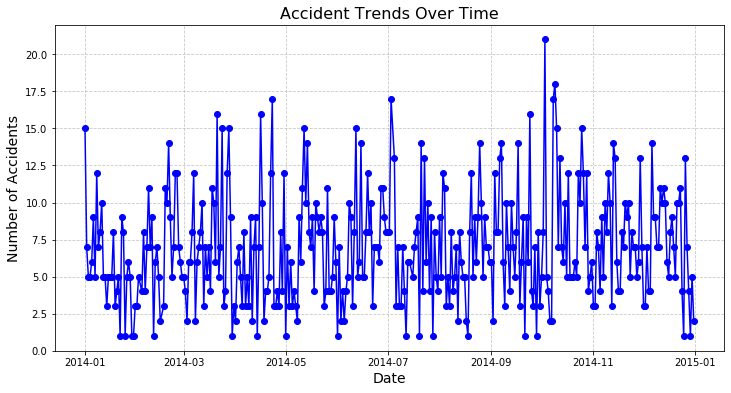

In [13]:
# Convert Accident Date to datetime format if not already
df['Accident Date'] = pd.to_datetime(df['Accident Date'])

# Group data by Accident Date
daily_accidents = df.groupby('Accident Date')['Reference Number'].count()

print(daily_accidents[daily_accidents > 20] )

# Plot a time series line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents.index, daily_accidents.values, color='blue', marker='o', linestyle='-')
plt.title('Accident Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


# Visualize accident hotspots 

In [14]:
print("\nData before modifying columns : \n")
df


Data before modifying columns : 



Reference Number  Grid Ref: Easting  Grid Ref: Northing  \
0             1112091             429175              431904   
1             1180869             430429              431025   
2             1180869             430429              431025   
3             11A0238             424660              427582   
4             11A0238             424660              427582   
...               ...                ...                 ...   
2528          1CV0080             428839              433995   
2529          1CV0542             436092              434785   
2530          2130577             426119              426906   
2531          21D1298             430261              431186   
2532          25D0630             430906              433484   

      Number of Vehicles  Number of Casualties Accident Date  Time (24hr)  \
0                      2                     1    01/01/2014         1840   
1                      3                     2    08/01/2014         1430   
2                      3                     2    08/01/2014         1430   
3                      3                     2    10/01/2014          817   
4                      3                     2    10/01/2014          817   
...                  ...                   ...           ...          ...   
2528                   1                     1    31/12/2014          153   
2529                   2                     1    31/12/2014         1310   
2530                   1                     1    25/12/2014          830   
2531                   1                     1    27/12/2014           50   
2532                   2                     1    13/05/2014         1220   

      1st Road Class  Road Surface  Lighting Conditions  Weather Conditions  \
0                  6             2                    4                   2   
1                  1             2                    1                   1   
2                  1             2                    1                   1   
3                  1             1                    1                   1   
4                  1             1                    1                   1   
...              ...           ...                  ...                 ...   
2528               6             2                    4                   1   
2529               6             2                    1                   1   
2530               6             1                    1                   1   
2531               6             1                    7                   1   
2532               6             1                    1                   1   

      Casualty Class  Casualty Severity  Sex of Casualty  Age of Casualty  \
0                  1                  3                1               58   
1                  1                  3                1               69   
2                  1                  3                2               41   
3                  1                  3                1               35   
4                  1                  3                1               25   
...              ...                ...              ...              ...   
2528               3                  2                1               19   
2529               2                  3                2               15   
2530               2                  3                1               71   
2531               3                  3                1               23   
2532               1                  2                1               77   

      Type of Vehicle  
0                   9  
1                   9  
2                   9  
3                   9  
4                   9  
...               ...  
2528                8  
2529                9  
2530                8  
2531                9  
2532               22  

[2533 rows x 16 columns]

Adding new columns 

In [15]:
# Transforming grid references into latitude and longitude

# Define projections: source (Easting/Northing) and target (WGS84 - Lat/Lon)
proj_grid = Proj('epsg:27700')  # Example for British National Grid
proj_latlon = Proj('epsg:4326')  # WGS84 for Lat/Lon

# Convert the columns
df['Latitude'], df['Longitude'] = transform(
    proj_grid, proj_latlon,
    df['Grid Ref: Easting'].values, df['Grid Ref: Northing'].values
)

# View the updated data
df


C:\Users\pclat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\pclat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Reference Number  Grid Ref: Easting  Grid Ref: Northing  \
0             1112091             429175              431904   
1             1180869             430429              431025   
2             1180869             430429              431025   
3             11A0238             424660              427582   
4             11A0238             424660              427582   
...               ...                ...                 ...   
2528          1CV0080             428839              433995   
2529          1CV0542             436092              434785   
2530          2130577             426119              426906   
2531          21D1298             430261              431186   
2532          25D0630             430906              433484   

      Number of Vehicles  Number of Casualties Accident Date  Time (24hr)  \
0                      2                     1    2014-01-01         1840   
1                      3                     2    2014-08-01         1430   
2                      3                     2    2014-08-01         1430   
3                      3                     2    2014-10-01          817   
4                      3                     2    2014-10-01          817   
...                  ...                   ...           ...          ...   
2528                   1                     1    2014-12-31          153   
2529                   2                     1    2014-12-31         1310   
2530                   1                     1    2014-12-25          830   
2531                   1                     1    2014-12-27           50   
2532                   2                     1    2014-05-13         1220   

      1st Road Class  Road Surface  Lighting Conditions  Weather Conditions  \
0                  6             2                    4                   2   
1                  1             2                    1                   1   
2                  1             2                    1                   1   
3                  1             1                    1                   1   
4                  1             1                    1                   1   
...              ...           ...                  ...                 ...   
2528               6             2                    4                   1   
2529               6             2                    1                   1   
2530               6             1                    1                   1   
2531               6             1                    7                   1   
2532               6             1                    1                   1   

      Casualty Class  Casualty Severity  Sex of Casualty  Age of Casualty  \
0                  1                  3                1               58   
1                  1                  3                1               69   
2                  1                  3                2               41   
3                  1                  3                1               35   
4                  1                  3                1               25   
...              ...                ...              ...              ...   
2528               3                  2                1               19   
2529               2                  3                2               15   
2530               2                  3                1               71   
2531               3                  3                1               23   
2532               1                  2                1               77   

      Type of Vehicle Severity Category   Latitude  Longitude  
0                   9             Fatal  53.782650  -1.558712  
1                   9             Fatal  53.774678  -1.539768  
2                   9             Fatal  53.774678  -1.539768  
3                   9             Fatal  53.744037  -1.627575  
4                   9             Fatal  53.744037  -1.627575  
...               ...               ...        ...   

In [16]:
# Initialize the map centered at an average location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Severity: {row['Severity Category']}",
        icon=folium.Icon(color='red' if row['Severity Category'] == 'Fatal' else 'blue')
    ).add_to(marker_cluster)

# Display the map
m


In [17]:

# Initialize the map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Add heatmap layer
heat_data = [[row['Latitude'], row['Longitude']] for _, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m


Summary

1. Patterns Based on Time of Day - 

    The histogram reveals a distinct peak in accident frequency around midnight, suggesting a higher likelihood of 
    incidents during this time period.
    
    
    
2. Impact of Weather -

    The analysis indicates that 'Fine without high winds' is the weather condition associated with the highest occurrence 
    of accidents.
    
    
3. Impact of Road Surface -

    The analysis reveals that 'Dry' road surfaces are associated with the highest number of accidents.
    
    
4. Accident Severity Distribution -

    Based on pie chart we can conclude that majority of accidents are fatal


5. Histogram for Age of Casualty -

    It indicates young age group people die in accidents as compared to old-age group


6. Gender distribution pie chart -

    It indicates that male die in accident than female
    

7. Distribution of Accidents by Lighting Conditions -

    The bar chart revels that most accident takes place in Daylight when street lights present (and lit)
    

8. Accident Trends Over Time -

    Line chart indicates that maximum number of  accident (21) took place on 2014-10-03 
    

9. Visualize accident hotspots -

    The heatmap shows that accidents are very frequent in Colorado ,UK